In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Myocardial_infarction.csv')

In [4]:
df.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.columns[1]

'AGE'

## At time of admission in Hospital

In [25]:
y= df.iloc[:,112:]
y.head()

,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
y.isnull().sum()

FIBR_PREDS    0
PREDS_TAH     0
JELUD_TAH     0
FIBR_JELUD    0
A_V_BLOK      0
OTEK_LANC     0
RAZRIV        0
DRESSLER      0
ZSN           0
REC_IM        0
P_IM_STEN     0
LET_IS        0
dtype: int64

In [43]:
x= df.iloc[:,:112]
x.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [44]:
x.drop(['ID'],axis=1,inplace=True)

In [45]:
col=[93,94,95,100,101,102,103,104,105]
x.drop(x.columns[col],axis=1,inplace=True)

In [46]:
x.shape

(1700, 102)

In [47]:
pd.set_option('display.max_rows',None)
x.isnull().sum()

AGE                 8
SEX                 0
INF_ANAM            4
STENOK_AN         106
FK_STENOK          73
IBS_POST           51
IBS_NASL         1628
GB                  9
SIM_GIPERT          8
DLIT_AG           248
ZSN_A              54
nr_11              21
nr_01              21
nr_02              21
nr_03              21
nr_04              21
nr_07              21
nr_08              21
np_01              18
np_04              18
np_05              18
np_07              18
np_08              18
np_09              18
np_10              18
endocr_01          11
endocr_02          10
endocr_03          10
zab_leg_01          7
zab_leg_02          7
zab_leg_03          7
zab_leg_04          7
zab_leg_06          7
S_AD_KBRIG       1076
D_AD_KBRIG       1076
S_AD_ORIT         267
D_AD_ORIT         267
O_L_POST           12
K_SH_POST          15
MP_TP_POST         14
SVT_POST           12
GT_POST            12
FIB_G_POST         12
ant_im             83
lat_im             80
inf_im    

In [50]:
for i in x.columns:
    x[i].fillna(value=x[i].median(),inplace=True)

In [51]:
x.isnull().sum()

AGE              0
SEX              0
INF_ANAM         0
STENOK_AN        0
FK_STENOK        0
IBS_POST         0
IBS_NASL         0
GB               0
SIM_GIPERT       0
DLIT_AG          0
ZSN_A            0
nr_11            0
nr_01            0
nr_02            0
nr_03            0
nr_04            0
nr_07            0
nr_08            0
np_01            0
np_04            0
np_05            0
np_07            0
np_08            0
np_09            0
np_10            0
endocr_01        0
endocr_02        0
endocr_03        0
zab_leg_01       0
zab_leg_02       0
zab_leg_03       0
zab_leg_04       0
zab_leg_06       0
S_AD_KBRIG       0
D_AD_KBRIG       0
S_AD_ORIT        0
D_AD_ORIT        0
O_L_POST         0
K_SH_POST        0
MP_TP_POST       0
SVT_POST         0
GT_POST          0
FIB_G_POST       0
ant_im           0
lat_im           0
inf_im           0
post_im          0
IM_PG_P          0
ritm_ecg_p_01    0
ritm_ecg_p_02    0
ritm_ecg_p_04    0
ritm_ecg_p_06    0
ritm_ecg_p_0

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=12)
model.fit(x,y)
print(model.feature_importances_)

[3.22946305e-02 1.46158648e-02 1.89878570e-02 2.24915866e-02
 1.52501881e-02 2.01844516e-02 1.18040845e-03 2.05635110e-02
 5.53244649e-03 2.35865846e-02 2.45021905e-02 4.08645352e-03
 9.86937861e-04 2.17466692e-03 7.02745634e-03 2.58906733e-03
 3.31608923e-04 2.25383353e-04 7.89524934e-04 1.89246382e-04
 1.83784409e-03 1.95605909e-05 8.52699568e-04 1.79797990e-04
 1.06088105e-03 1.25675579e-02 5.59020456e-03 1.40792649e-03
 7.34138131e-03 1.22620299e-02 6.02651869e-03 1.22449057e-03
 2.21101258e-03 2.15562266e-02 2.02147158e-02 3.23394188e-02
 2.97480525e-02 7.69244777e-03 1.33131886e-02 6.95647904e-03
 1.84719304e-03 1.49231503e-03 2.18713348e-03 2.23723461e-02
 2.45744105e-02 2.14207490e-02 1.19805221e-02 7.59021581e-03
 1.00045814e-02 4.27592830e-03 2.98926551e-03 3.26546163e-05
 8.69093925e-03 3.41651579e-03 7.32918698e-03 1.83230542e-03
 1.05595809e-02 6.25258898e-03 6.27539910e-03 2.88631218e-03
 1.47721356e-03 1.07528827e-03 8.34599326e-04 5.11436465e-05
 6.73952380e-03 1.333254

Text(0.5, 1.0, 'Comparison of different Feature Importances')

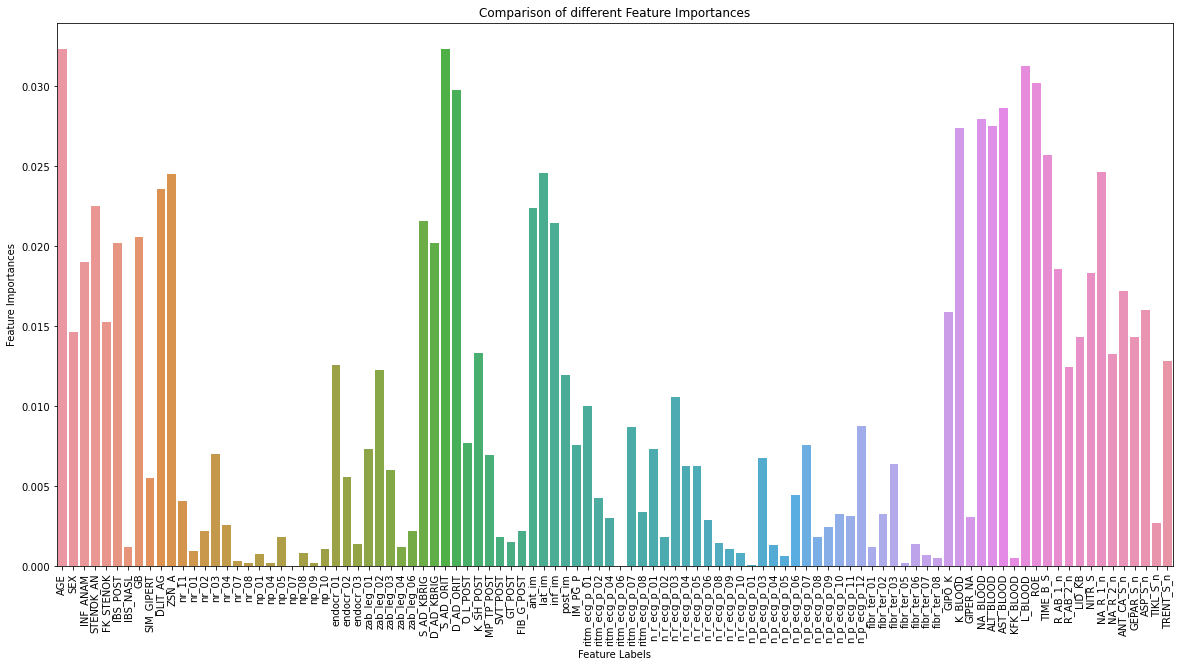

In [60]:
plt.figure(figsize=(20,10))
sns.barplot(x=x.columns,y=model.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')